In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Defining Learning Parameters

In [2]:
# learning parameters
batch_size = 64
# epochs = 100
epochs = 40
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 3 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare Training Dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [128]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [129]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [130]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for Training

In [131]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [132]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [133]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [134]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [135]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)


In [136]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)


In [137]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Writing Training Loop

938it [02:52,  5.45it/s]                                                        


Epoch 1 of 40
Generator loss: 9.05193066, Discriminator loss: 0.24455909


938it [02:52,  5.44it/s]                                                        


Epoch 2 of 40
Generator loss: 7.89046327, Discriminator loss: 0.26768242


938it [02:53,  5.41it/s]                                                        


Epoch 3 of 40
Generator loss: 4.97867541, Discriminator loss: 0.44370169


938it [02:53,  5.41it/s]                                                        


Epoch 4 of 40
Generator loss: 3.90941098, Discriminator loss: 0.66278830


938it [02:53,  5.41it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


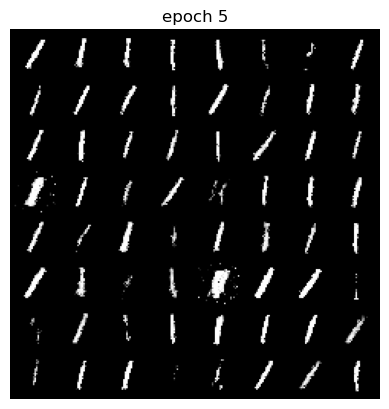

Epoch 5 of 40
Generator loss: 3.14470027, Discriminator loss: 0.87168738


938it [08:19,  1.88it/s]                                                        


Epoch 6 of 40
Generator loss: 2.89889604, Discriminator loss: 0.97532336


938it [02:51,  5.48it/s]                                                        


Epoch 7 of 40
Generator loss: 2.78674494, Discriminator loss: 1.04440204


938it [02:52,  5.45it/s]                                                        


Epoch 8 of 40
Generator loss: 2.75678078, Discriminator loss: 1.15369615


938it [02:52,  5.45it/s]                                                        


Epoch 9 of 40
Generator loss: 2.55171817, Discriminator loss: 1.34187629


938it [02:54,  5.39it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


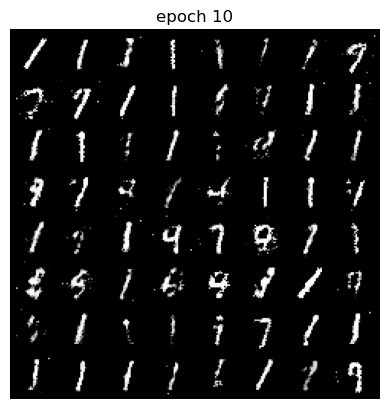

Epoch 10 of 40
Generator loss: 2.38152685, Discriminator loss: 1.49662274


938it [02:53,  5.42it/s]                                                        


Epoch 11 of 40
Generator loss: 2.34000972, Discriminator loss: 1.60921640


938it [02:54,  5.38it/s]                                                        


Epoch 12 of 40
Generator loss: 2.19628887, Discriminator loss: 1.77973897


938it [02:54,  5.36it/s]                                                        


Epoch 13 of 40
Generator loss: 2.02605454, Discriminator loss: 1.93365403


938it [02:54,  5.39it/s]                                                        


Epoch 14 of 40
Generator loss: 1.98122871, Discriminator loss: 2.01938396


938it [02:53,  5.42it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


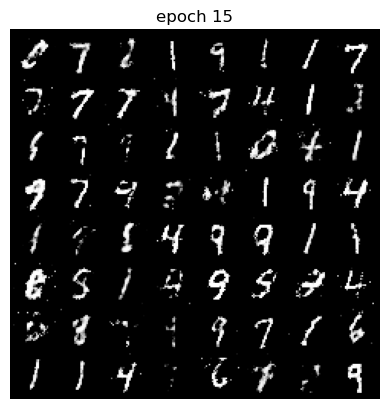

Epoch 15 of 40
Generator loss: 1.88603367, Discriminator loss: 2.10591576


938it [02:57,  5.29it/s]                                                        


Epoch 16 of 40
Generator loss: 1.82671887, Discriminator loss: 2.21250317


938it [02:53,  5.40it/s]                                                        


Epoch 17 of 40
Generator loss: 1.76011378, Discriminator loss: 2.31426606


938it [02:51,  5.46it/s]                                                        


Epoch 18 of 40
Generator loss: 1.68904428, Discriminator loss: 2.42136036


938it [02:52,  5.45it/s]                                                        


Epoch 19 of 40
Generator loss: 1.65097571, Discriminator loss: 2.49547746


938it [02:51,  5.47it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


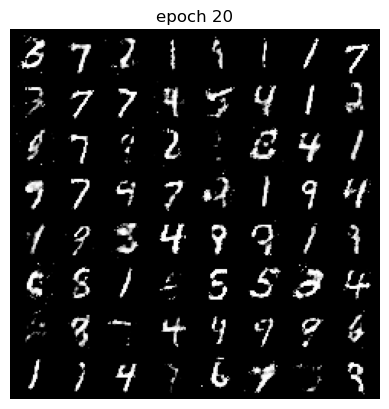

Epoch 20 of 40
Generator loss: 1.58457347, Discriminator loss: 2.57578162


938it [02:54,  5.39it/s]                                                        


Epoch 21 of 40
Generator loss: 1.56583498, Discriminator loss: 2.61043298


938it [02:56,  5.31it/s]                                                        


Epoch 22 of 40
Generator loss: 1.55692104, Discriminator loss: 2.64664464


938it [02:54,  5.38it/s]                                                        


Epoch 23 of 40
Generator loss: 1.53122189, Discriminator loss: 2.69709447


938it [02:54,  5.38it/s]                                                        


Epoch 24 of 40
Generator loss: 1.50353152, Discriminator loss: 2.73302649


938it [02:52,  5.42it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


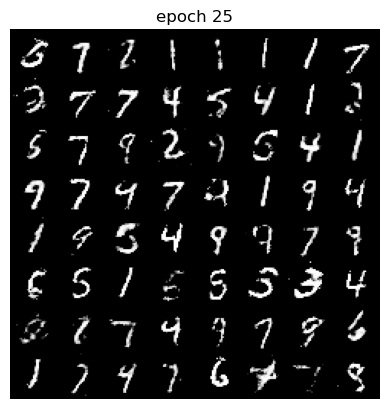

Epoch 25 of 40
Generator loss: 1.46816300, Discriminator loss: 2.78014591


938it [02:52,  5.45it/s]                                                        


Epoch 26 of 40
Generator loss: 1.46203642, Discriminator loss: 2.81090399


938it [02:53,  5.40it/s]                                                        


Epoch 27 of 40
Generator loss: 1.46368464, Discriminator loss: 2.81765201


938it [02:52,  5.45it/s]                                                        


Epoch 28 of 40
Generator loss: 1.44544829, Discriminator loss: 2.84428583


938it [02:51,  5.46it/s]                                                        


Epoch 29 of 40
Generator loss: 1.42337816, Discriminator loss: 2.87762005


938it [02:52,  5.44it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


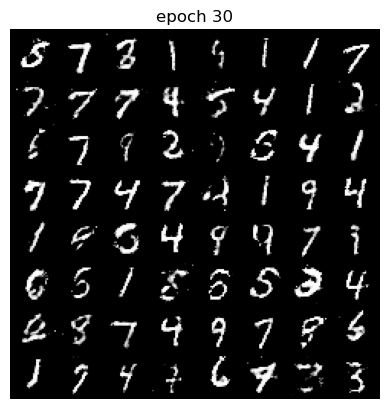

Epoch 30 of 40
Generator loss: 1.43458697, Discriminator loss: 2.87058667


938it [02:52,  5.43it/s]                                                        


Epoch 31 of 40
Generator loss: 1.40711283, Discriminator loss: 2.90501574


938it [02:52,  5.45it/s]                                                        


Epoch 32 of 40
Generator loss: 1.39170292, Discriminator loss: 2.93148076


938it [02:54,  5.37it/s]                                                        


Epoch 33 of 40
Generator loss: 1.39568254, Discriminator loss: 2.93201300


938it [02:52,  5.43it/s]                                                        


Epoch 34 of 40
Generator loss: 1.36786384, Discriminator loss: 2.96810308


938it [02:54,  5.39it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


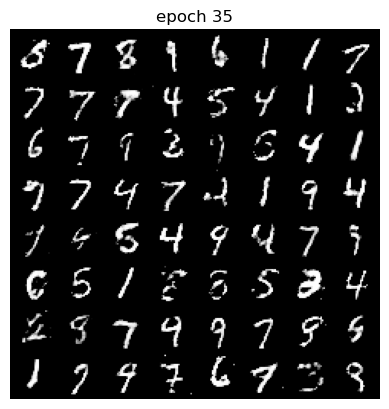

Epoch 35 of 40
Generator loss: 1.37167920, Discriminator loss: 2.96730519


938it [02:51,  5.47it/s]                                                        


Epoch 36 of 40
Generator loss: 1.34629382, Discriminator loss: 2.99325045


938it [02:52,  5.43it/s]                                                        


Epoch 37 of 40
Generator loss: 1.35364012, Discriminator loss: 3.00069546


938it [02:52,  5.43it/s]                                                        


Epoch 38 of 40
Generator loss: 1.35311317, Discriminator loss: 3.00888038


938it [02:51,  5.46it/s]                                                        


Epoch 39 of 40
Generator loss: 1.32554334, Discriminator loss: 3.03522824


938it [02:52,  5.45it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


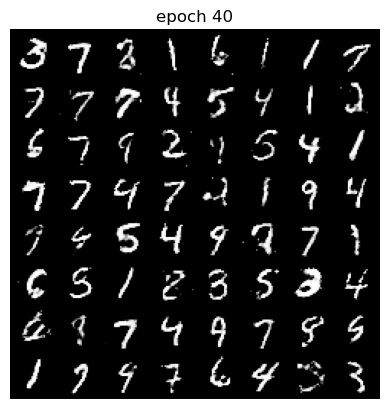

Epoch 40 of 40
Generator loss: 1.32990194, Discriminator loss: 3.03967649


In [138]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    
    optim_g.zero_grad()
    loss = criterion(output, true_label)
    loss.backward()
    optim_g.step()
    return loss.item()
    
    
def discriminator_loss(output, true_label):

    optim_d.zero_grad()
    loss = criterion(output, true_label)
    loss.backward()
    optim_d.step()
    return loss.item()
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        
        
        reals,_ = data
        reals = reals.to(device)
        batch_size = reals.shape[0]
        
        # Train Discriminator with k steps
        for step in range(k):
            
            fake_data = generator(create_noise(batch_size, nz))
            fake_output = discriminator(fake_data)
            fake_label = label_fake(batch_size)
            fake_loss = discriminator_loss(fake_output, fake_label)
            
            real_data = reals
            real_output = discriminator(real_data)
            real_label = label_real(batch_size)
            real_loss = discriminator_loss(real_output, real_label)
            
            loss_d += (fake_loss + real_loss)
        
        
        # Train Generator
        fake_data = generator(create_noise(batch_size, nz)) 
        fake_output = discriminator(fake_data)
        fake_reals = label_real(batch_size)
        loss_g += generator_loss(fake_output, fake_reals)
            
    
        
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [139]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [140]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

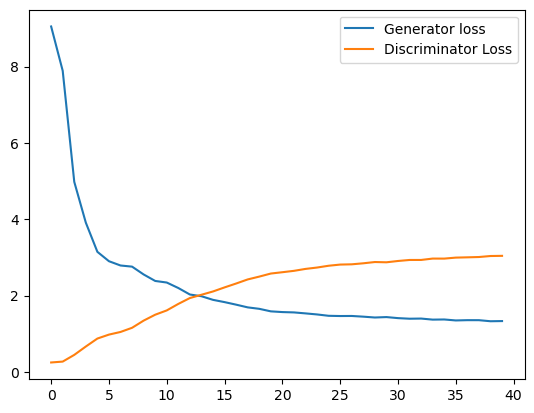

In [141]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')